<a href="https://colab.research.google.com/github/wangyi111/GAN-in-practice/blob/master/08_UGATIT/tensorflow/UGATIT_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/My Drive/UGATIT-tensorflow/

/content/drive/My Drive/UGATIT-tensorflow


In [19]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from PIL import Image
import os
import matplotlib.pyplot as plt

1.15.2


## Train (with colab, limited memory)
Set --light as True because we don't have enough memory in colab.

In [10]:
!python main.py --dataset selfie2anime --light True --iteration 100 --save_freq 50 --epoch 5

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2020-09-25 10:41:11.813280: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2020-09-25 10:41:11.813756: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2f3cd80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-09-25 10:41:11.813793: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-09-25 10:41:11.819450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-09-25 10:41:11.959395: I tensorflow/stream_executor/cuda

## Test (with colab) 
Set --light as True in consistence with the trained model.

In [ ]:
!python main.py --dataset selfie2anime --phase test --light True

## Train (with pretrained checkpoint)
Do this only if the memory size is big enough. Put the provided checkpoint (50/100 epochs) in the checkpoint folder.

In [ ]:
!python main.py --dataset selfie2anime

## Test (with pretrained checkpoint)


In [25]:
!python main.py --dataset selfie2anime --phase test

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2020-09-25 13:42:05.493908: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2020-09-25 13:42:05.494235: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1546d80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-09-25 13:42:05.494271: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-09-25 13:42:05.509380: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-09-25 13:42:05.585396: I tensorflow/stream_executor/cuda

## Check the results

Text(0.5, 1.0, 'testB')

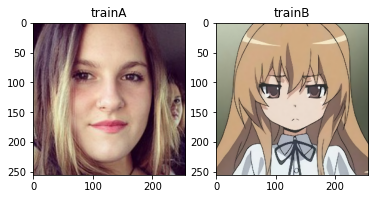

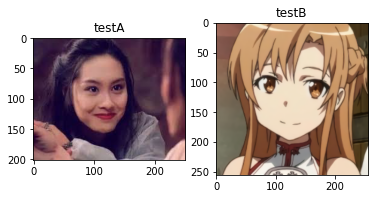

In [42]:


dir = 'dataset/selfie2anime/'

img_trainA = Image.open(os.path.join(dir,'trainA/female_10.jpg'))
img_trainB = Image.open(os.path.join(dir,'trainB/0000.jpg'))
img_testA = Image.open(os.path.join(dir,'testA/zhuyin1.jpg'))
img_testB = Image.open(os.path.join(dir,'testB/0000.jpg'))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_trainA)
plt.title('trainA')
plt.subplot(1,2,2)
plt.imshow(img_trainB)
plt.title('trainB')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_testA)
plt.title('testA')
plt.subplot(1,2,2)
plt.imshow(img_testB)
plt.title('testB')

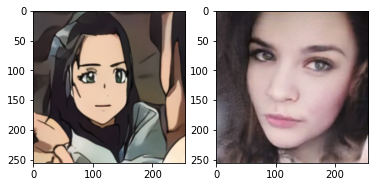

In [43]:
out_dir = './results/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/'
img_testA_out = Image.open(os.path.join(out_dir,'zhuyin1.jpg'))
img_testB_out = Image.open(os.path.join(out_dir,'0000.jpg'))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_testA_out)
plt.subplot(1,2,2)
plt.imshow(img_testB_out)
plt.show()